In [49]:
# imports
import pandas as pd
import numpy as np

In [76]:
# fetch manga csv
manga_df = pd.read_csv('./data/manga.csv')
manga_df.head()

,manga_id,title,type,score,scored_by,status,volumes,chapters,start_date,end_date,...,demographics,authors,serializations,synopsis,background,main_picture,url,title_english,title_japanese,title_synonyms
0,2,Berserk,manga,9.47,319696,currently_publishing,NaN,NaN,1989-08-25,NaN,...,['Seinen'],"[{'id': 1868, 'first_name': 'Kentarou', 'last_...",['Young Animal'],"Guts, a former mercenary now known as the ""Bla...",Berserk won the Award for Excellence at the si...,https://cdn.myanimelist.net/images/manga/1/157...,https://myanimelist.net/manga/2/Berserk,Berserk,ベルセルク,['Berserk: The Prototype']
1,13,One Piece,manga,9.22,355375,currently_publishing,NaN,NaN,1997-07-22,NaN,...,['Shounen'],"[{'id': 1881, 'first_name': 'Eiichiro', 'last_...",['Shounen Jump (Weekly)'],"Gol D. Roger, a man referred to as the ""King o...",One Piece is the highest selling manga series ...,https://cdn.myanimelist.net/images/manga/2/253...,https://myanimelist.net/manga/13/One_Piece,One Piece,ONE PIECE,[]
2,1706,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,manga,9.30,151433,finished,24.0,96.0,2004-01-19,2011-04-19,...,"['Seinen', 'Shounen']","[{'id': 2619, 'first_name': 'Hirohiko', 'last_...",['Ultra Jump'],"In the American Old West, the world's greatest...",JoJo no Kimyou na Bouken Part 7: Steel Ball Ru...,https://cdn.myanimelist.net/images/manga/3/179...,https://myanimelist.net/manga/1706/JoJo_no_Kim...,NaN,ジョジョの奇妙な冒険 Part7 STEEL BALL RUN,"[""JoJo's Bizarre Adventure Part 7: Steel Ball ..."
3,4632,Oyasumi Punpun,manga,9.02,168459,finished,13.0,147.0,2007-03-15,2013-11-02,...,['Seinen'],"[{'id': 2836, 'first_name': 'Inio', 'last_name...",['Big Comic Spirits'],Punpun Onodera is a normal 11-year-old boy liv...,Oyasumi Punpun was originally serialized in Yo...,https://cdn.myanimelist.net/images/manga/3/266...,https://myanimelist.net/manga/4632/Oyasumi_Punpun,Goodnight Punpun,おやすみプンプン,[]
4,25,Fullmetal Alchemist,manga,9.03,153151,finished,27.0,116.0,2001-07-12,2010-09-11,...,['Shounen'],"[{'id': 1874, 'first_name': 'Hiromu', 'last_na...",['Shounen Gangan'],Alchemists are knowledgeable and naturally tal...,Hagane no Renkinjutsushi won the 49th Shogakuk...,https://cdn.myanimelist.net/images/manga/3/243...,https://myanimelist.net/manga/25/Fullmetal_Alc...,Fullmetal Alchemist,鋼の錬金術師,"['Full Metal Alchemist', 'Hagane no Renkinjuts..."


In [77]:
# get columns
columns = manga_df.columns
print(columns)

# get all genres
genres = manga_df['genres']
grenres = genres.dropna()
grenres

Index(['manga_id', 'title', 'type', 'score', 'scored_by', 'status', 'volumes',
       'chapters', 'start_date', 'end_date', 'members', 'favorites', 'sfw',
       'approved', 'created_at_before', 'updated_at', 'real_start_date',
       'real_end_date', 'genres', 'themes', 'demographics', 'authors',
       'serializations', 'synopsis', 'background', 'main_picture', 'url',
       'title_english', 'title_japanese', 'title_synonyms'],
      dtype='object')


0        ['Action', 'Adventure', 'Award Winning', 'Dram...
1                       ['Action', 'Adventure', 'Fantasy']
2        ['Action', 'Adventure', 'Mystery', 'Supernatur...
3                               ['Drama', 'Slice of Life']
4        ['Action', 'Adventure', 'Award Winning', 'Dram...
                               ...                        
64828                          ['Romance', 'Supernatural']
64829                           ['Comedy', 'Supernatural']
64830                          ['Romance', 'Supernatural']
64831                                           ['Comedy']
64832                                 ['Action', 'Sci-Fi']
Name: genres, Length: 64833, dtype: object

In [78]:
import ast

# get unique genres
unique_genres = []

for genre in grenres:
    genre = ast.literal_eval(genre)
    unique_genres.extend(genre)

unique_genres = list(set(unique_genres))
unique_genres

['Fantasy',
 'Action',
 'Ecchi',
 'Avant Garde',
 'Supernatural',
 'Gourmet',
 'Mystery',
 'Hentai',
 'Suspense',
 'Sci-Fi',
 'Romance',
 'Adventure',
 'Comedy',
 'Girls Love',
 'Slice of Life',
 'Boys Love',
 'Sports',
 'Horror',
 'Erotica',
 'Award Winning',
 'Drama']

In [80]:
# fetch title, score, and genres of manga from the dataframe
data = manga_df[['title', 'score', 'genres', 'favorites', 'synopsis']]

# convert genres to list
data = data.drop_duplicates()
data['genres'] = data['genres'].apply(lambda x: ast.literal_eval(x))
data.dropna(inplace=True)
data

,title,score,genres,favorites,synopsis
0,Berserk,9.47,"[Action, Adventure, Award Winning, Drama, Fant...",119470,"Guts, a former mercenary now known as the ""Bla..."
1,One Piece,9.22,"[Action, Adventure, Fantasy]",111462,"Gol D. Roger, a man referred to as the ""King o..."
2,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,9.30,"[Action, Adventure, Mystery, Supernatural]",41713,"In the American Old West, the world's greatest..."
3,Oyasumi Punpun,9.02,"[Drama, Slice of Life]",49361,Punpun Onodera is a normal 11-year-old boy liv...
4,Fullmetal Alchemist,9.03,"[Action, Adventure, Award Winning, Drama, Fant...",29634,Alchemists are knowledgeable and naturally tal...
...,...,...,...,...,...
24630,Toro Ane,5.78,[Hentai],0,A guy helps friend learn how to roller-skate
24632,Houkago,5.82,"[Romance, Slice of Life]",0,"Oneshot about Takeshita Mari, a 3rd year in Ju..."
24633,Home Stay x Steady,5.84,"[Comedy, Ecchi]",0,from Animea: Natasha is a russian girl went to...
24634,Oni Shimin,5.71,"[Comedy, Fantasy]",0,A little ogre kid lives on an island inhabited...


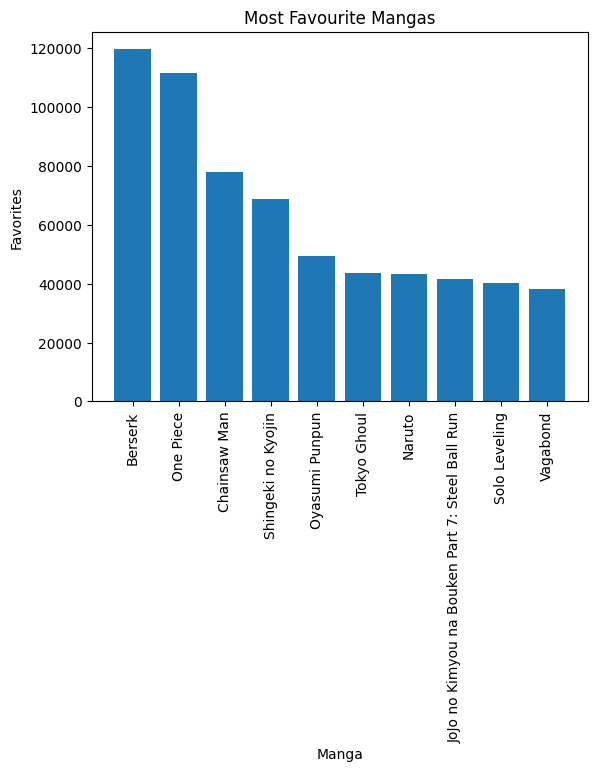

In [81]:
# visualize data
import matplotlib.pyplot as plt

# plot most favourite mangas
favorites = data.sort_values(by='favorites', ascending=False)
favorites = favorites.head(10)
plt.bar(favorites['title'], favorites['favorites'])
plt.title('Most Favourite Mangas')
plt.xlabel('Manga')
plt.ylabel('Favorites')
plt.xticks(rotation=90)
plt.show()


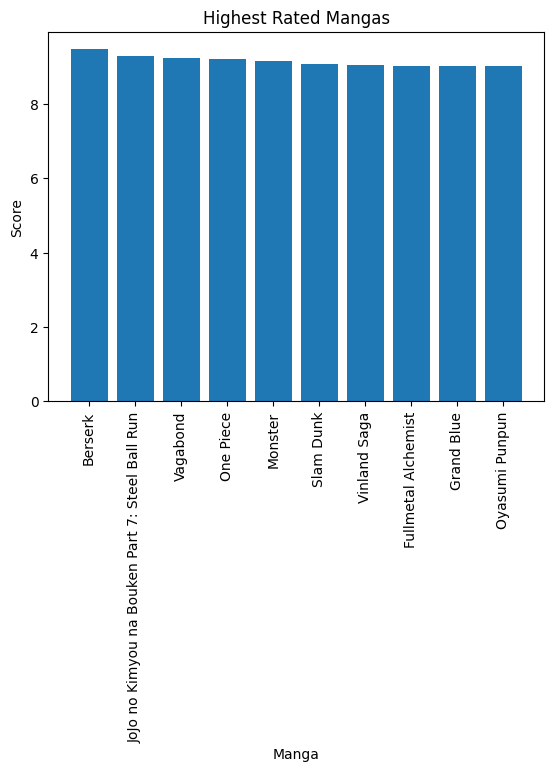

In [82]:
# plot highest rated mangas
highest_rated = data.sort_values(by='score', ascending=False)
highest_rated = highest_rated.head(10)
plt.bar(highest_rated['title'], highest_rated['score'])
plt.title('Highest Rated Mangas')
plt.xlabel('Manga')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.show()

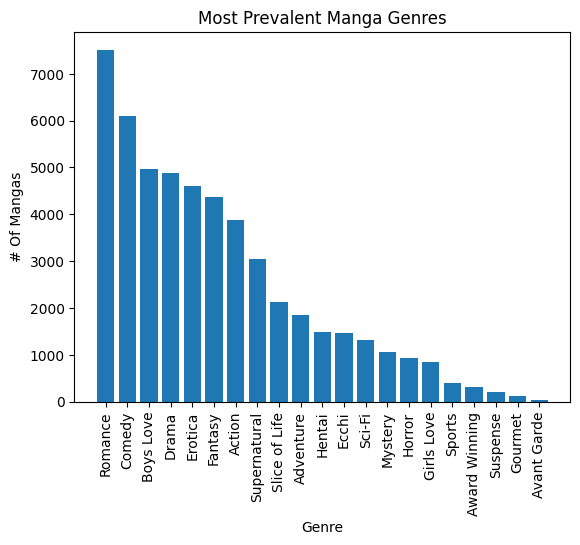

In [83]:
# plot most prevalent manga genres
genre_count = {}

for genre in unique_genres:
    genre_count[genre] = 0

for genre in data['genres']:
    for g in genre:
        genre_count[g] += 1

genre_count = dict(sorted(genre_count.items(), key=lambda x: x[1], reverse=True))
plt.bar(genre_count.keys(), genre_count.values())
plt.title('Most Prevalent Manga Genres')
plt.xlabel('Genre')
plt.ylabel('# Of Mangas')
plt.xticks(rotation=90)
plt.show()

# Observations:

- Most manga genres are 'Romance', 'Comedy', 'Boys Love', 'Drama', among others;
    - Similar genres corresponding to the 'Shoujo' audience.
- Highest rated/favorited mangas are of 'Shounen' variety:
    - Berserk: 'Action', 'Adventure'; One Piece: 'Action', 'Adventure', etc.

In [84]:
# prepare data for clustering

genre_data = data[['title', 'score', 'favorites', 'genres']]

for genre in unique_genres:
    genre_data[genre] = genre_data['genres'].apply(lambda x: 1 if genre in x else 0)

genre_data.drop(columns=['genres'], inplace=True)
genre_data

,title,score,favorites,Fantasy,Action,Ecchi,Avant Garde,Supernatural,Gourmet,Mystery,...,Adventure,Comedy,Girls Love,Slice of Life,Boys Love,Sports,Horror,Erotica,Award Winning,Drama
0,Berserk,9.47,119470,1,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,1,1
1,One Piece,9.22,111462,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,9.30,41713,0,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
3,Oyasumi Punpun,9.02,49361,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,Fullmetal Alchemist,9.03,29634,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24630,Toro Ane,5.78,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24632,Houkago,5.82,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
24633,Home Stay x Steady,5.84,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
24634,Oni Shimin,5.71,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [87]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/neil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [91]:
# remove stopwords from manga synopsis

# fetch stopwords
stop_words = set(stopwords.words('english'))

desc_data = data.loc[:, ['title', 'synopsis']]
desc_data = desc_data.dropna()
desc_data


,title,synopsis
0,Berserk,"Guts, a former mercenary now known as the ""Bla..."
1,One Piece,"Gol D. Roger, a man referred to as the ""King o..."
2,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,"In the American Old West, the world's greatest..."
3,Oyasumi Punpun,Punpun Onodera is a normal 11-year-old boy liv...
4,Fullmetal Alchemist,Alchemists are knowledgeable and naturally tal...
...,...,...
24630,Toro Ane,A guy helps friend learn how to roller-skate
24632,Houkago,"Oneshot about Takeshita Mari, a 3rd year in Ju..."
24633,Home Stay x Steady,from Animea: Natasha is a russian girl went to...
24634,Oni Shimin,A little ogre kid lives on an island inhabited...


In [92]:
# remove stopwords from manga synopsis
desc_data['synopsis'] = desc_data['synopsis'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
desc_data

,title,synopsis
0,Berserk,"Guts, former mercenary known ""Black Swordsman,..."
1,One Piece,"Gol D. Roger, man referred ""King Pirates,"" set..."
2,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,"American Old West, world's greatest race begin..."
3,Oyasumi Punpun,Punpun Onodera normal 11-year-old boy living J...
4,Fullmetal Alchemist,Alchemists knowledgeable naturally talented in...
...,...,...
24630,Toro Ane,guy helps friend learn roller-skate
24632,Houkago,"Oneshot Takeshita Mari, 3rd year Junior High S..."
24633,Home Stay x Steady,Animea: Natasha russian girl went study anothe...
24634,Oni Shimin,little ogre kid lives island inhabited race ci...


In [95]:
# tokenize synopsis
from collections import Counter

desc_data['key_words'] = desc_data.loc[:, 'synopsis'].apply(lambda x: Counter(x.split()))
desc_data


,title,synopsis,key_words
0,Berserk,"Guts, former mercenary known ""Black Swordsman,...","{'Guts,': 2, 'former': 1, 'mercenary': 1, 'kno..."
1,One Piece,"Gol D. Roger, man referred ""King Pirates,"" set...","{'Gol': 1, 'D.': 2, 'Roger,': 1, 'man': 2, 're..."
2,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,"American Old West, world's greatest race begin...","{'American': 1, 'Old': 1, 'West,': 1, 'world's..."
3,Oyasumi Punpun,Punpun Onodera normal 11-year-old boy living J...,"{'Punpun': 3, 'Onodera': 1, 'normal': 1, '11-y..."
4,Fullmetal Alchemist,Alchemists knowledgeable naturally talented in...,"{'Alchemists': 1, 'knowledgeable': 1, 'natural..."
...,...,...,...
24630,Toro Ane,guy helps friend learn roller-skate,"{'guy': 1, 'helps': 1, 'friend': 1, 'learn': 1..."
24632,Houkago,"Oneshot Takeshita Mari, 3rd year Junior High S...","{'Oneshot': 1, 'Takeshita': 1, 'Mari,': 1, '3r..."
24633,Home Stay x Steady,Animea: Natasha russian girl went study anothe...,"{'Animea:': 1, 'Natasha': 1, 'russian': 1, 'gi..."
24634,Oni Shimin,little ogre kid lives island inhabited race ci...,"{'little': 1, 'ogre': 1, 'kid': 1, 'lives': 1,..."


In [58]:
# import GMM model and metrics
from sklearn import mixture
from sklearn import metrics

In [30]:
# set constants
np.random.seed(47)
NUM_GENRES = len(unique_genres)

In [ ]:
# would you like this manga classification; [0, 1] output, based on genres, score, and favorites

In [31]:
GMM = mixture.GaussianMixture(n_components=NUM_GENRES, covariance_type='full')
GMM.fit(genre_data.iloc[:, 3:])

GaussianMixture(n_components=21)